<a href="https://colab.research.google.com/github/PETEROA/Population-Trends-/blob/main/A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('WorldPopulation2023.csv') #read the file

In [3]:
df.head

<bound method NDFrame.head of      Rank          Country  Population2023 YearlyChange  NetChange  \
0      36      Afghanistan        42239854       2.70 %    1111083   
1     138          Albania         2832439      -0.35 %      -9882   
2      34          Algeria        45606480       1.57 %     703255   
3     212   American Samoa           43914      -0.81 %       -359   
4     202          Andorra           80088       0.33 %        264   
..    ...              ...             ...          ...        ...   
229   225  Wallis & Futuna           11502      -0.60 %        -70   
230   172   Western Sahara          587259       1.96 %      11273   
231    44            Yemen        34449825       2.24 %     753211   
232    63           Zambia        20569737       2.76 %     552062   
233    74         Zimbabwe        16665409       2.11 %     344872   

     Density(P/Km²)  Land Area(Km²)  Migrants(net)  Fert.Rate  MedianAge  \
0                65          652860         -65846   

In [4]:
def wrangle_data(data_path):
  df = pd.read_csv('WorldPopulation2023.csv')

  df = df.drop_duplicates()  # Remove duplicate rows
  df = df.dropna()  # Remove rows with missing values
  return df


In [5]:
  data_path = 'WorldPopulation2023.csv'

In [6]:
cleaned_data = wrangle_data(data_path)

In [7]:
print(cleaned_data)

     Rank          Country  Population2023 YearlyChange  NetChange  \
0      36      Afghanistan        42239854       2.70 %    1111083   
1     138          Albania         2832439      -0.35 %      -9882   
2      34          Algeria        45606480       1.57 %     703255   
3     212   American Samoa           43914      -0.81 %       -359   
4     202          Andorra           80088       0.33 %        264   
..    ...              ...             ...          ...        ...   
229   225  Wallis & Futuna           11502      -0.60 %        -70   
230   172   Western Sahara          587259       1.96 %      11273   
231    44            Yemen        34449825       2.24 %     753211   
232    63           Zambia        20569737       2.76 %     552062   
233    74         Zimbabwe        16665409       2.11 %     344872   

     Density(P/Km²)  Land Area(Km²)  Migrants(net)  Fert.Rate  MedianAge  \
0                65          652860         -65846        4.4       17.0   
1      

In [8]:
missing_values = df.isnull().sum() # find missing values

In [9]:

print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Rank              0
Country           0
Population2023    0
YearlyChange      0
NetChange         0
Density(P/Km²)    0
Land Area(Km²)    0
Migrants(net)     0
Fert.Rate         1
MedianAge         1
UrbanPop%         0
WorldShare        0
dtype: int64


In [10]:
# Using Imputation to handle missing values
imputer = SimpleImputer(strategy='mean')  # Other strategies: 'median', 'most_frequent'
# Apply imputation to columns with missing values
df['Fert.Rate'] = imputer.fit_transform(df[['Fert.Rate']])
df['MedianAge'] = imputer.fit_transform(df[['MedianAge']])

In [11]:
print(missing_values)

Rank              0
Country           0
Population2023    0
YearlyChange      0
NetChange         0
Density(P/Km²)    0
Land Area(Km²)    0
Migrants(net)     0
Fert.Rate         1
MedianAge         1
UrbanPop%         0
WorldShare        0
dtype: int64


In [12]:
# Handle duplicates in the data
duplicates = df.duplicated()
duplicates_specific_columns = df.duplicated(subset=['Country', 'Rank'])

print("Duplicates in the entire DataFrame:")
print(duplicates)

print("Duplicates in specific columns:")
print(duplicates_specific_columns)

Duplicates in the entire DataFrame:
0      False
1      False
2      False
3      False
4      False
       ...  
229    False
230    False
231    False
232    False
233    False
Length: 234, dtype: bool
Duplicates in specific columns:
0      False
1      False
2      False
3      False
4      False
       ...  
229    False
230    False
231    False
232    False
233    False
Length: 234, dtype: bool


In [13]:
# Outlier Detection
Q1 = df['Migrants(net)'].quantile(0.25)
Q3 = df['Migrants(net)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Migrants(net)'] < lower_bound) | (df['Migrants(net)'] > upper_bound)]

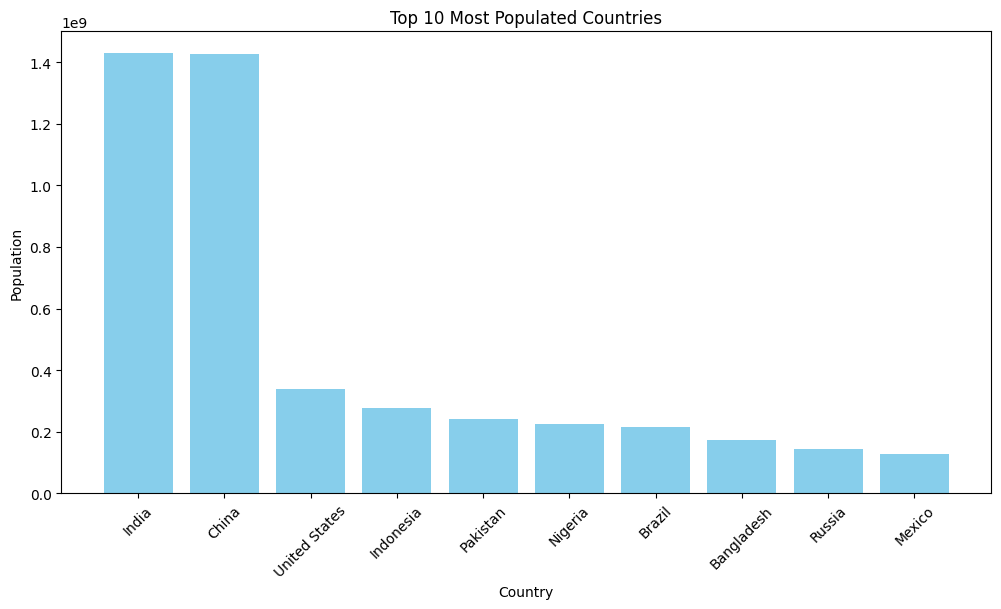

In [14]:
df_sorted = df.sort_values(by='Population2023', ascending=False)

# Top 10 most populated countries
top_10_most_populated = df_sorted.head(10)

# Top 10 least populated countries
top_10_least_populated = df_sorted.tail(10)

# Plotting the bar chart for top 10 most populated countries
plt.figure(figsize=(12, 6))
plt.bar(top_10_most_populated['Country'], top_10_most_populated['Population2023'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Top 10 Most Populated Countries')
plt.xticks(rotation=45)
plt.show()


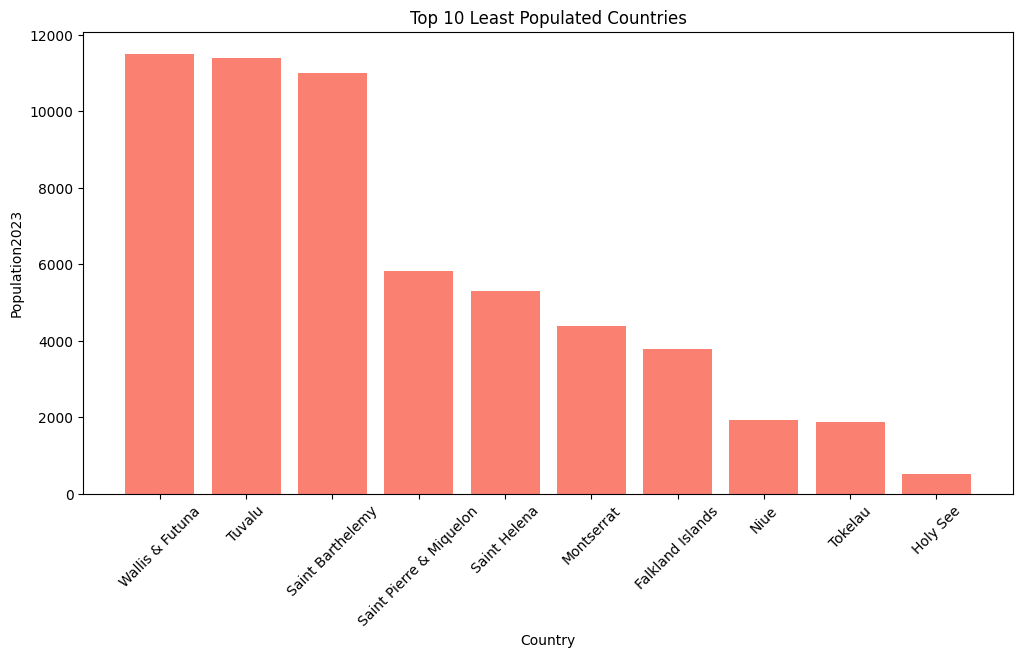

In [15]:
# Plotting the bar chart for top 10 least populated countries
plt.figure(figsize=(12, 6))
plt.bar(top_10_least_populated['Country'], top_10_least_populated['Population2023'], color='salmon')
plt.xlabel('Country')
plt.ylabel('Population2023')
plt.title('Top 10 Least Populated Countries')
plt.xticks(rotation=45)
plt.show()

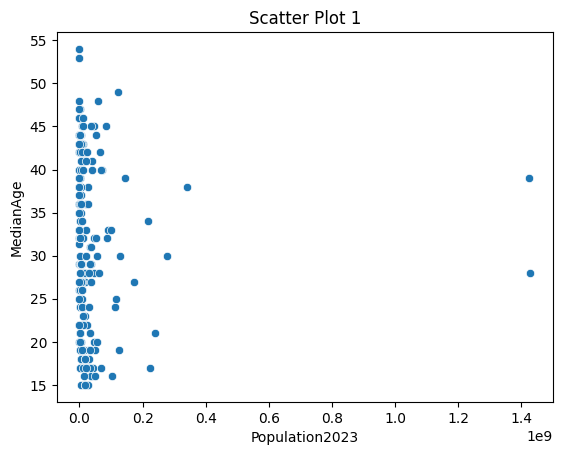

In [ ]:
#Data Relationhips
#Scatterplot
sns.scatterplot(x='Population2023', y='MedianAge', data=df)
plt.title('Scatter Plot 1')
plt.show()

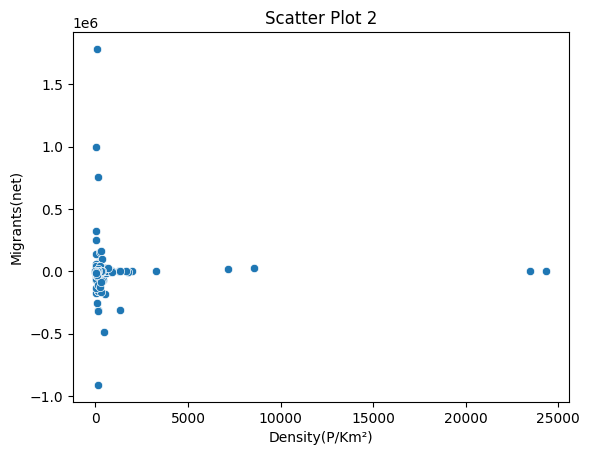

In [ ]:
#Data Relationhips
#Scatterplot
sns.scatterplot(x='Density(P/Km²)', y='Migrants(net)', data=df)
plt.title('Scatter Plot 2')
plt.show()

<ipython-input-27-9ac19e1983d5>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[[feature1, feature2]].corr()


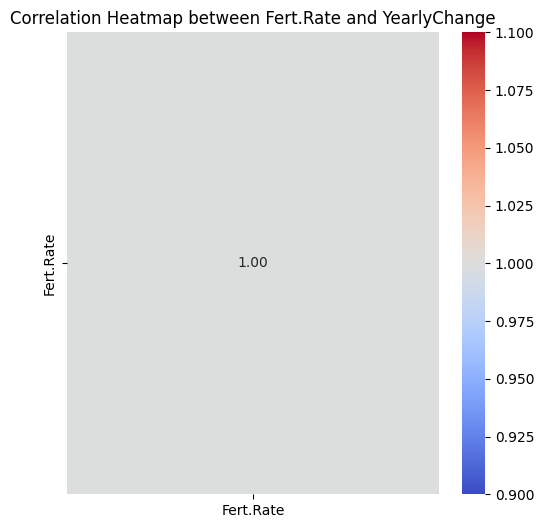

In [ ]:
#Data Relationhips
#Heatmap
feature1 = 'Fert.Rate'
feature2 = 'YearlyChange'

correlation_matrix = df[[feature1, feature2]].corr()

plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Heatmap between {feature1} and {feature2}')
plt.show()



<ipython-input-50-49d15d0df3c6>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[[feature1, feature2]].corr()


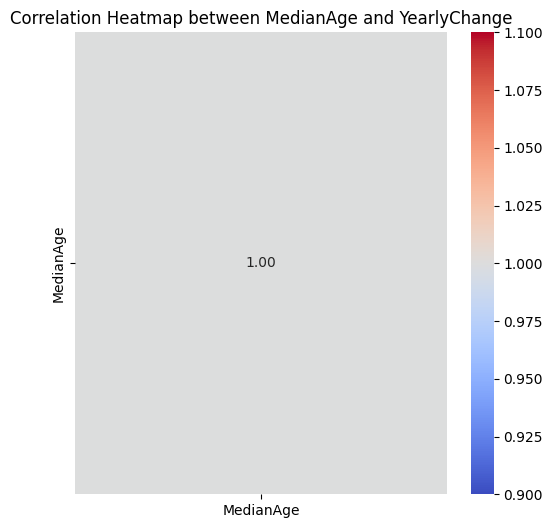

In [ ]:
#'MedianAge', y='YearlyChange', data=df)
#Data Relationhips
#Heatmap
feature1 = 'MedianAge'
feature2 = 'YearlyChange'

correlation_matrix = df[[feature1, feature2]].corr()

plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Heatmap between {feature1} and {feature2}')
plt.show()



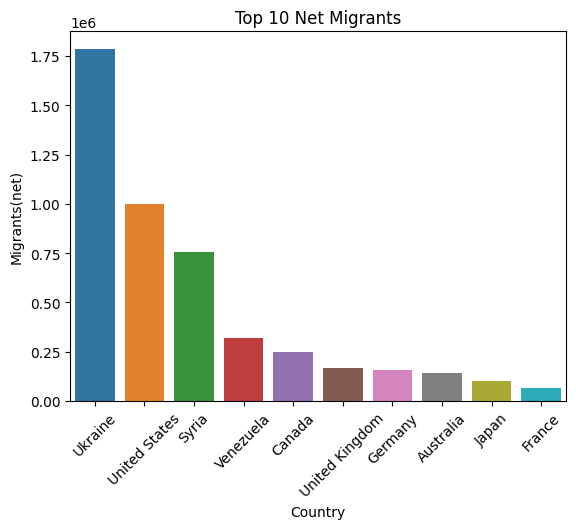

In [ ]:
# Top destination countries
top_destinations = df.groupby('Country')['Migrants(net)'].sum().nlargest(10)
sns.barplot(x=top_destinations.index, y=top_destinations.values)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Migrants(net)')
plt.title('Top 10 Net Migrants')
plt.show()

In [ ]:
df.describe()

,Rank,Population2023,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,MedianAge
count,234.000000,2.340000e+02,2.340000e+02,234.000000,2.340000e+02,2.340000e+02,233.000000,233.000000
mean,117.500000,3.437565e+07,3.000230e+05,477.414530,5.559568e+05,1.301282e+01,2.414163,31.309013
std,67.694165,1.373861e+08,1.001815e+06,2320.693692,1.691024e+06,1.698334e+05,1.155913,9.628386
min,1.000000,5.180000e+02,-2.957105e+06,0.000000,0.000000e+00,-9.104750e+05,0.800000,15.000000
25%,59.250000,4.696482e+05,2.360000e+02,38.250000,2.650000e+03,-9.776750e+03,1.600000,22.000000
50%,117.500000,5.643895e+06,2.860150e+04,96.500000,7.972000e+04,-5.000000e+02,2.000000,32.000000
75%,175.750000,2.324537e+07,2.236855e+05,242.000000,4.070800e+05,4.750000e+02,3.000000,40.000000
max,234.000000,1.428628e+09,1.145449e+07,24360.000000,1.637687e+07,1.784718e+06,6.700000,54.000000


In [ ]:
column_data_types = df.dtypes

print("Data Types for Each Column:")
print(column_data_types)

Data Types for Each Column:
Rank                int64
Country            object
Population2023      int64
YearlyChange       object
NetChange           int64
Density(P/Km²)      int64
Land Area(Km²)      int64
Migrants(net)       int64
Fert.Rate         float64
MedianAge         float64
UrbanPop%          object
WorldShare         object
dtype: object


In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Rank': [ 36 138  34 212 202  42 223 200  33 140 197  55 100  90 177 154   8 187
  97  82 178  77 205 165  80 137 144   7 219 176 110  59  78 171  73  53
  38 220 204 117  67  65   2  28 163 113 222 124 130  85 190 158  89  51
 115 160 203  84  15  68  14 112 152 131 156 159  11 207 231 162 118  23
 184 185 146 141 132  19  47 217  91 206 194 179 192  70  75 148 164  81
 234  88 104  94 180   1   4  17  35 125 201  98  25 139  12  83  66  26
 193 129 109 103 151 122 147 120 107 214 142 168 167  50  62  46 175  58
 174 213 181 126 157 182  10 173 134 215 133 169 230  39  48  27 145 224
  49  72 186 123 106  54   6 232  56 150 208 119 127   5 221 128  92 108
  45  13  37  93 136 143  64   9  76 161 227 229 209 191 218 228 189 216
 188  40  71 105 196 102 114 211 116 149 166  69  24  29  86  32  61 198
 121  31 170  87 101  60  57  95  22  20 155  99 233 195 153  79  18 111
 210 226 199  30  41  96  21   3 135  43 183  52  16 225 172  44  63  74]
Unique values in 'Country

In [ ]:
print(df.isnull())

      Rank  Country  Population2023  YearlyChange  NetChange  Density(P/Km²)  \
0    False    False           False         False      False           False   
1    False    False           False         False      False           False   
2    False    False           False         False      False           False   
3    False    False           False         False      False           False   
4    False    False           False         False      False           False   
..     ...      ...             ...           ...        ...             ...   
229  False    False           False         False      False           False   
230  False    False           False         False      False           False   
231  False    False           False         False      False           False   
232  False    False           False         False      False           False   
233  False    False           False         False      False           False   

     Land Area(Km²)  Migrants(net)  Fer

In [ ]:
top_10_populated_countries = df[['Country', 'Population2023']].nlargest(10, 'Population2023')


In [ ]:
print("Top 10 Most Populated Countries:")
print(top_10_populated_countries)

Top 10 Most Populated Countries:
           Country  Population2023
95           India      1428627663
42           China      1425671352
223  United States       339996563
96       Indonesia       277534122
157       Pakistan       240485658
150        Nigeria       223804632
27          Brazil       216422446
16      Bangladesh       172954319
169         Russia       144444359
132         Mexico       128455567


In [ ]:
top_10_least_populated_countries = df[['Country', 'Population2023']].nsmallest(10, 'Population2023')

In [ ]:
print("Top 10 Least Populated Countries:")
print(top_10_least_populated_countries)

Top 10 Least Populated Countries:
                     Country  Population2023
90                  Holy See             518
210                  Tokelau            1893
151                     Niue            1935
68          Falkland Islands            3791
138               Montserrat            4386
173             Saint Helena            5314
177  Saint Pierre & Miquelon            5840
172         Saint Barthelemy           10994
217                   Tuvalu           11396
229          Wallis & Futuna           11502


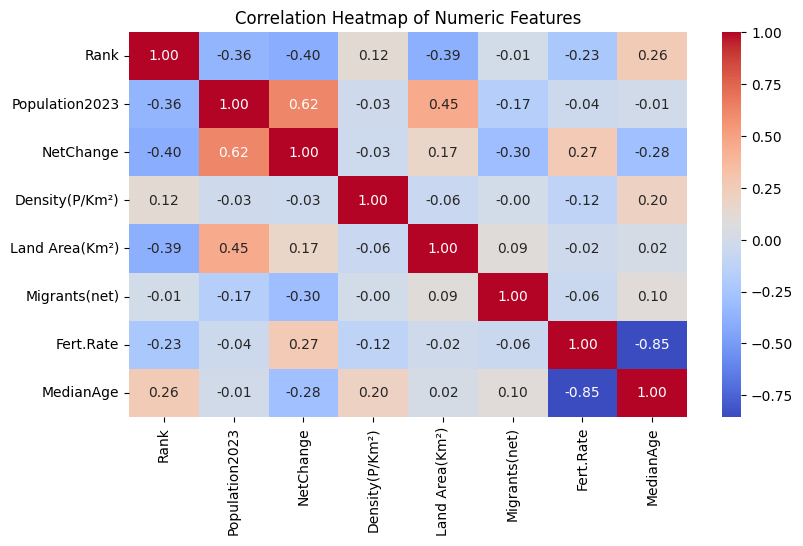

In [ ]:
# Correlation between numeric features in dataset
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(9, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()